In [1]:
%matplotlib inline



# Grid Coordinates



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import verde as vd
from matplotlib.patches import Rectangle

First let's create a region that is 1000 units west-east and 1000 units south-north,
and we will set an initial spacing to 100 units.



In [4]:
spacing = 100
west, east, south, north = 0, 1000, 0, 1000
region = (west, east, south, north)

# create the grid coordinates
easting, northing = vd.grid_coordinates(region=region, spacing=spacing)

In [5]:
print(easting.shape, northing.shape)

(11, 11) (11, 11)


Let's define two functions to visualize the region bounds and grid points



In [6]:
def plot_region(ax, region):
    "Plot the region as a solid line."
    west, east, south, north = region
    ax.add_patch(
        plt.Rectangle((west, south), east, north, fill=None, label="Region Bounds")
    )


def plot_grid(ax, coordinates, linestyles="dotted", region=None, pad=50, **kwargs):
    "Plot the grid coordinates as dots and lines."
    data_region = vd.get_region(coordinates)
    ax.vlines(
        coordinates[0][0],
        ymin=data_region[2],
        ymax=data_region[3],
        linestyles=linestyles,
        zorder=0,
    )
    ax.hlines(
        coordinates[1][:, 1],
        xmin=data_region[0],
        xmax=data_region[1],
        linestyles=linestyles,
        zorder=0,
    )
    ax.scatter(*coordinates, **kwargs)
    if pad:
        padded = vd.pad_region(region, pad=pad)
        plt.xlim(padded[:2])
        plt.ylim(padded[2:])

Visualize our region and grid coordinates using our functions



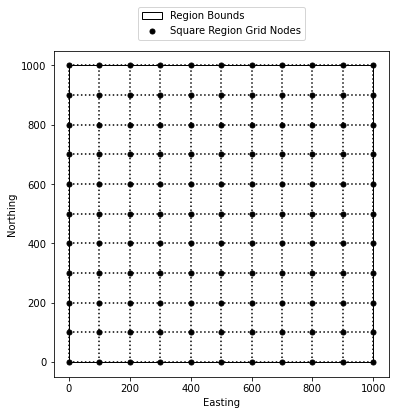

In [7]:
plt.figure(figsize=(6, 6))
ax = plt.subplot(111)
plot_region(ax=ax, region=region)
plot_grid(
    ax=ax,
    coordinates=(easting, northing),
    region=region,
    label="Square Region Grid Nodes",
    marker=".",
    color="black",
    s=100,
)

plt.xlabel("Easting")
plt.ylabel("Northing")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15))
plt.show()

## Adjusting region boundaries when creating the grid coordinates

Now let's change our spacing to 300 units.

We could tell :func:`verde.grid_coordinates` to adjust the region boundaries by
passing ``adjust="region"``.



In [8]:
spacing = 300
region_easting, region_northing = vd.grid_coordinates(
    region=region, spacing=spacing, adjust="region"
)
print(region_easting.shape, region_northing.shape)

(4, 4) (4, 4)


In [9]:
print(region_easting)
print(region_northing)

[[  0. 300. 600. 900.]
 [  0. 300. 600. 900.]
 [  0. 300. 600. 900.]
 [  0. 300. 600. 900.]]
[[  0.   0.   0.   0.]
 [300. 300. 300. 300.]
 [600. 600. 600. 600.]
 [900. 900. 900. 900.]]


## Adjusting spacing when creating the grid

Now let's adjust the spacing of the grid points by passing ``adjust="spacing"``
to :func:`verde.grid_coordinates`.



In [10]:
spacing_easting, spacing_northing = vd.grid_coordinates(
    region=region, spacing=spacing, adjust="spacing"
)
print(spacing_easting.shape, spacing_northing.shape)

(4, 4) (4, 4)


However the regular spacing between the grid points is no longer 300 units.



In [11]:
print(spacing_easting)
print(spacing_northing)

[[   0.          333.33333333  666.66666667 1000.        ]
 [   0.          333.33333333  666.66666667 1000.        ]
 [   0.          333.33333333  666.66666667 1000.        ]
 [   0.          333.33333333  666.66666667 1000.        ]]
[[   0.            0.            0.            0.        ]
 [ 333.33333333  333.33333333  333.33333333  333.33333333]
 [ 666.66666667  666.66666667  666.66666667  666.66666667]
 [1000.         1000.         1000.         1000.        ]]


## Visualize the different adjustments

Let's visualize the difference between the original region bounds, the
adjusted region grid nodes, and the adjusted spacing grid nodes.


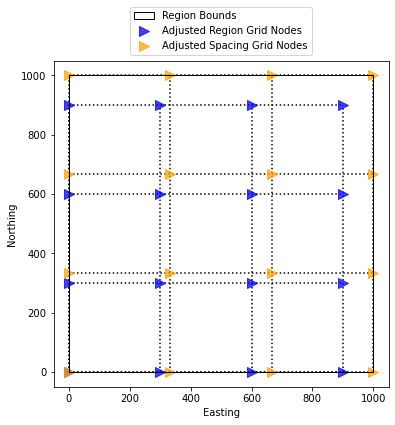

In [12]:
plt.figure(figsize=(6, 6))
ax = plt.subplot(111)
plot_region(ax=ax, region=region)
plot_grid(
    ax=ax,
    coordinates=(region_easting, region_northing),
    region=region,
    label="Adjusted Region Grid Nodes",
    marker=">",
    color="blue",
    alpha=0.75,
    s=100,
)
plot_grid(
    ax=ax,
    coordinates=(spacing_easting, spacing_northing),
    region=region,
    label="Adjusted Spacing Grid Nodes",
    marker=">",
    color="orange",
    alpha=0.75,
    s=100,
)
plt.xlabel("Easting")
plt.ylabel("Northing")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.18))
plt.show()

## Pixel Registration

Pixel registration locates the grid points in the middle of the grid segments
rather than in the corner of each grid node.



In [13]:
spacing = 100
pixel_easting, pixel_northing = vd.grid_coordinates(
    region=region, spacing=spacing, pixel_register=True
)
print(pixel_easting.shape, pixel_northing.shape)

(10, 10) (10, 10)


And we can check the coordinates for the grid points with pixel registration.



In [14]:
print(pixel_easting)
print(pixel_northing)

[[ 50. 150. 250. 350. 450. 550. 650. 750. 850. 950.]
 [ 50. 150. 250. 350. 450. 550. 650. 750. 850. 950.]
 [ 50. 150. 250. 350. 450. 550. 650. 750. 850. 950.]
 [ 50. 150. 250. 350. 450. 550. 650. 750. 850. 950.]
 [ 50. 150. 250. 350. 450. 550. 650. 750. 850. 950.]
 [ 50. 150. 250. 350. 450. 550. 650. 750. 850. 950.]
 [ 50. 150. 250. 350. 450. 550. 650. 750. 850. 950.]
 [ 50. 150. 250. 350. 450. 550. 650. 750. 850. 950.]
 [ 50. 150. 250. 350. 450. 550. 650. 750. 850. 950.]
 [ 50. 150. 250. 350. 450. 550. 650. 750. 850. 950.]]
[[ 50.  50.  50.  50.  50.  50.  50.  50.  50.  50.]
 [150. 150. 150. 150. 150. 150. 150. 150. 150. 150.]
 [250. 250. 250. 250. 250. 250. 250. 250. 250. 250.]
 [350. 350. 350. 350. 350. 350. 350. 350. 350. 350.]
 [450. 450. 450. 450. 450. 450. 450. 450. 450. 450.]
 [550. 550. 550. 550. 550. 550. 550. 550. 550. 550.]
 [650. 650. 650. 650. 650. 650. 650. 650. 650. 650.]
 [750. 750. 750. 750. 750. 750. 750. 750. 750. 750.]
 [850. 850. 850. 850. 850. 850. 850. 850. 850

If we set ``pixel_register`` to ``False`` the function will return the grid
coordinates of the nodes instead of pixel centers, resulting in an extra point in each direction.



In [15]:
easting, northing = vd.grid_coordinates(
    region=region, spacing=spacing, pixel_register=False
)
print(easting.shape, northing.shape)

(11, 11) (11, 11)


Again we can check the coordinates for grid points with spacing adjustment.



In [16]:
print(easting)
print(northing)

[[   0.  100.  200.  300.  400.  500.  600.  700.  800.  900. 1000.]
 [   0.  100.  200.  300.  400.  500.  600.  700.  800.  900. 1000.]
 [   0.  100.  200.  300.  400.  500.  600.  700.  800.  900. 1000.]
 [   0.  100.  200.  300.  400.  500.  600.  700.  800.  900. 1000.]
 [   0.  100.  200.  300.  400.  500.  600.  700.  800.  900. 1000.]
 [   0.  100.  200.  300.  400.  500.  600.  700.  800.  900. 1000.]
 [   0.  100.  200.  300.  400.  500.  600.  700.  800.  900. 1000.]
 [   0.  100.  200.  300.  400.  500.  600.  700.  800.  900. 1000.]
 [   0.  100.  200.  300.  400.  500.  600.  700.  800.  900. 1000.]
 [   0.  100.  200.  300.  400.  500.  600.  700.  800.  900. 1000.]
 [   0.  100.  200.  300.  400.  500.  600.  700.  800.  900. 1000.]]
[[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [ 100.  100.  100.  100.  100.  100.  100.  100.  100.  100.  100.]
 [ 200.  200.  200.  200.  200.  200.  200.  200.  200.  200.  200.]
 [ 300.  300.  300.  300.  300.  

Lastly, we can visualize the pixel-registered grid points to see where they fall
within the original region bounds.



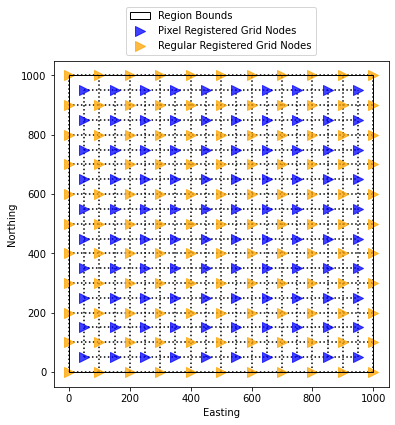

In [17]:
plt.figure(figsize=(6, 6))
ax = plt.subplot(111)
plot_region(ax=ax, region=region)
plot_grid(
    ax=ax,
    coordinates=(pixel_easting, pixel_northing),
    region=region,
    label="Pixel Registered Grid Nodes",
    marker=">",
    color="blue",
    alpha=0.75,
    s=100,
)
plot_grid(
    ax=ax,
    coordinates=(easting, northing),
    region=region,
    label="Regular Registered Grid Nodes",
    marker=">",
    color="orange",
    alpha=0.75,
    s=100,
)

plt.xlabel("Easting")
plt.ylabel("Northing")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.18))
plt.show()

## Extra Coordinates

In some cases, you might need an additional coordinate such as a height or a time
that is associated with your coordinate grid. The ``extra_coords`` parameter
in :func:`verde.grid_coordinates` creates an extra coordinate array that is the same
shape as the coordinate grid, but contains a constant value.



In [18]:
easting, northing, height, time = vd.grid_coordinates(
    region=region, spacing=spacing, extra_coords=[1000, 1]
)

print(easting.shape, northing.shape, height.shape, time.shape)

(11, 11) (11, 11) (11, 11) (11, 11)


And we can print the height array to verify that it is correct



In [19]:
print(height)

[[1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
 [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
 [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
 [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
 [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
 [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
 [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
 [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
 [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
 [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
 [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]]


And we can print the time array as well



In [20]:
print(time)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
